In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
df = pd.read_csv("data.csv")
df.head(3)

,Unnamed: 0,Movie Name,Year of Release,Run Time in minutes,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
0,0,The Shawshank Redemption,1994,142,9.3,2804443,82.0,28340000.0,['Drama'],R,['Frank Darabont'],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...","['Over', 'the', 'course', 'of', 'several', 'ye..."
1,1,The Godfather,1972,175,9.2,1954174,100.0,134970000.0,"['Crime', ' Drama']",R,['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan', '...","['Don', 'Vito', 'Corleone,', 'head', 'of', 'a'..."
2,2,Ramayana: The Legend of Prince Rama,1993,135,9.2,12995,NaN,NaN,"['Animation', ' Action', ' Adventure']",PG,"['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski']","['Arun Govil', 'Nikhil Kapoor', 'Edie Mirman',...","['An', 'anime', 'adaptation', 'of', 'the', 'Hi..."


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           10000 non-null  int64  
 1   Movie Name           10000 non-null  object 
 2   Year of Release      10000 non-null  int64  
 3   Run Time in minutes  10000 non-null  int64  
 4   Movie Rating         10000 non-null  float64
 5   Votes                10000 non-null  int64  
 6   MetaScore            7974 non-null   float64
 7   Gross                7085 non-null   float64
 8   Genre                10000 non-null  object 
 9   Certification        9631 non-null   object 
 10  Director             10000 non-null  object 
 11  Stars                10000 non-null  object 
 12  Description          10000 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 1015.8+ KB
None


In [6]:
df['MetaScore'] = pd.to_numeric(df['MetaScore'], errors='coerce') # Ensure it's numeric
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

df['MetaScore'].fillna(df['MetaScore'].mean(), inplace=True)
df['Gross'].fillna(df['Gross'].mean(), inplace=True)

print(df.isnull().sum())  

Unnamed: 0               0
Movie Name               0
Year of Release          0
Run Time in minutes      0
Movie Rating             0
Votes                    0
MetaScore                0
Gross                    0
Genre                    0
Certification          369
Director                 0
Stars                    0
Description              0
dtype: int64


C:\Users\ASIF-K\AppData\Local\Temp\ipykernel_9252\2132902295.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MetaScore'].fillna(df['MetaScore'].mean(), inplace=True)
C:\Users\ASIF-K\AppData\Local\Temp\ipykernel_9252\2132902295.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [10]:
df['Decade'] = (df['Year of Release'] // 10) * 10
df

,Unnamed: 0,Movie Name,Year of Release,Run Time in minutes,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description,Decade
0,0,The Shawshank Redemption,1994,142,9.3,2804443,82.000000,2.834000e+07,['Drama'],R,['Frank Darabont'],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...","['Over', 'the', 'course', 'of', 'several', 'ye...",1990
1,1,The Godfather,1972,175,9.2,1954174,100.000000,1.349700e+08,"['Crime', ' Drama']",R,['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan', '...","['Don', 'Vito', 'Corleone,', 'head', 'of', 'a'...",1970
2,2,Ramayana: The Legend of Prince Rama,1993,135,9.2,12995,59.171432,4.017500e+07,"['Animation', ' Action', ' Adventure']",PG,"['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski']","['Arun Govil', 'Nikhil Kapoor', 'Edie Mirman',...","['An', 'anime', 'adaptation', 'of', 'the', 'Hi...",1990
3,3,The Chaos Class,1975,87,9.2,42231,59.171432,4.017500e+07,"['Comedy', ' Drama']",NaN,['Ertem Egilmez'],"['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...","['Lazy,', 'uneducated', 'students', 'share', '...",1970
4,4,The Dark Knight,2008,152,9.0,2786129,84.000000,5.348600e+08,"['Action', ' Crime', ' Drama']",PG-13,['Christopher Nolan'],"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...","['When', 'the', 'menace', 'known', 'as', 'the'...",2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,Golmaal Again,2017,140,4.9,10183,59.171432,1.010000e+06,"['Action', ' Comedy', ' Fantasy']",Not Rated,['Rohit Shetty'],"['Ajay Devgn', 'Arshad Warsi', 'Tabu', 'Shreya...","['The', 'gang', 'encounters', 'with', 'some', ...",2010
9996,9996,Not to Forget,2021,84,4.9,11191,59.171432,4.017500e+07,['Drama'],NaN,['Valerio Zanoli'],"['Karen Grassle', 'Louis Gossett Jr.', ""Tatum ...","['After', 'a', 'lifetime', 'of', 'scams,', 'a'...",2020
9997,9997,Housefull 3,2016,140,4.9,10308,59.171432,1.160000e+06,"['Action', ' Comedy', ' Romance']",Not Rated,"['Sajid', 'Farhad Samji']","['Akshay Kumar', 'Abhishek Bachchan', 'Riteish...","['A', 'father', ""doesn't"", 'want', 'his', 'thr...",2010
9998,9998,A.I. Rising,2018,85,4.9,11187,59.171432,4.017500e+07,"['Drama', ' Romance', ' Sci-Fi']",R,['Lazar Bodroza'],"['Sebastian Cavazza', 'Stoya', 'Marusa Majer',...","['An', 'intimate', 'relationship', 'between', ...",2010


In [11]:
print(df.describe())

        Unnamed: 0  Year of Release  Run Time in minutes  Movie Rating  \
count  10000.00000     10000.000000         10000.000000  10000.000000   
mean    4999.50000      2001.413600           110.725000      6.727020   
std     2886.89568        18.597804            22.053073      0.821264   
min        0.00000      1915.000000            45.000000      4.900000   
25%     2499.75000      1994.000000            96.000000      6.100000   
50%     4999.50000      2007.000000           107.000000      6.700000   
75%     7499.25000      2015.000000           121.000000      7.300000   
max     9999.00000      2023.000000           439.000000      9.300000   

              Votes     MetaScore         Gross        Decade  
count  1.000000e+04  10000.000000  1.000000e+04  10000.000000  
mean   9.279738e+04     59.171432  4.017500e+07   1996.898000  
std    1.716509e+05     15.420365  5.680393e+07     18.835952  
min    1.000200e+04      7.000000  0.000000e+00   1910.000000  
25%    1.6851

In [15]:
numeric_cols = ['Year of Release', 'Run Time in minutes', 'Movie Rating', 'Votes', 'MetaScore', 'Gross']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col])  # Handles potential errors by coercing to NaN if needed

### Visualisation  Movie Rat vs. MetaScore

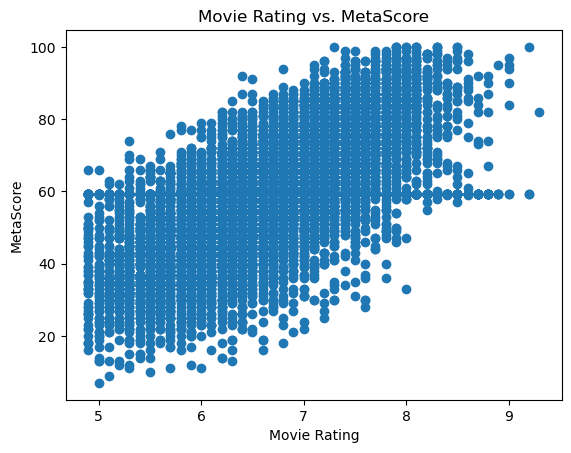

In [12]:
plt.scatter(df['Movie Rating'], df['MetaScore'])
plt.xlabel('Movie Rating')
plt.ylabel('MetaScore')
plt.title('Movie Rating vs. MetaScore')
plt.show()

### Histogram:** Distribution of 'Gross'

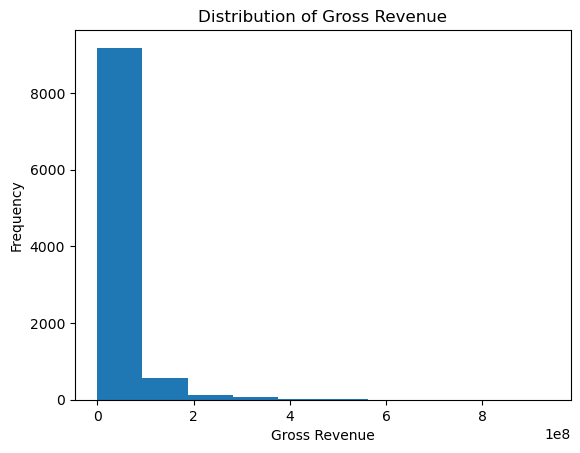

In [13]:
plt.hist(df['Gross'], bins=10)
plt.xlabel('Gross Revenue')
plt.ylabel('Frequency')
plt.title('Distribution of Gross Revenue')
plt.show()

### Correlation Heatmap:** Check for correlations between numerical features.

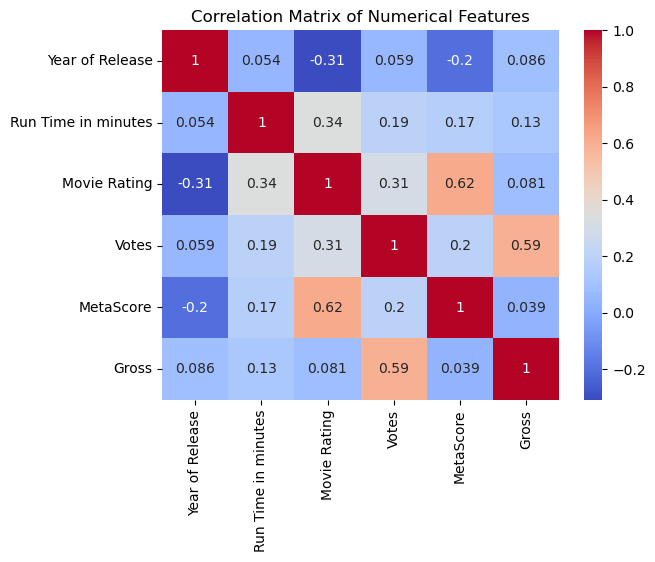

In [16]:
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [19]:
X = df[['Year of Release', 'Run Time in minutes', 'Movie Rating', 'Votes', 'Gross']]  
y = df['MetaScore']  

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 143.35772881433564
R-squared: 0.37747442307407353


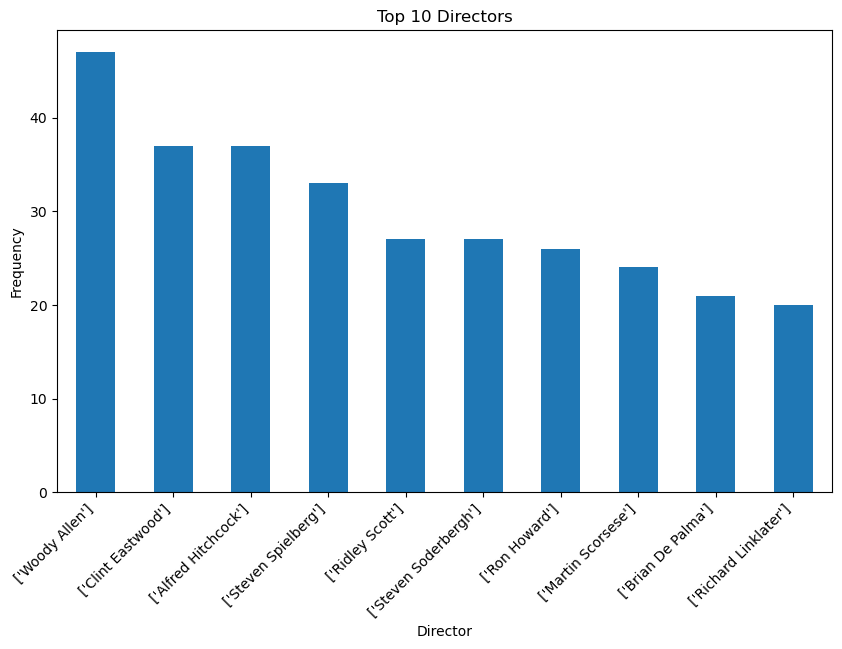

In [24]:
# Director distribution (Top N directors)
top_n = 10  # Show top 10 directors
director_counts = df['Director'].value_counts().nlargest(top_n)
plt.figure(figsize=(10, 6))
director_counts.plot(kind='bar')
plt.title(f'Top {top_n} Directors')
plt.xlabel('Director')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

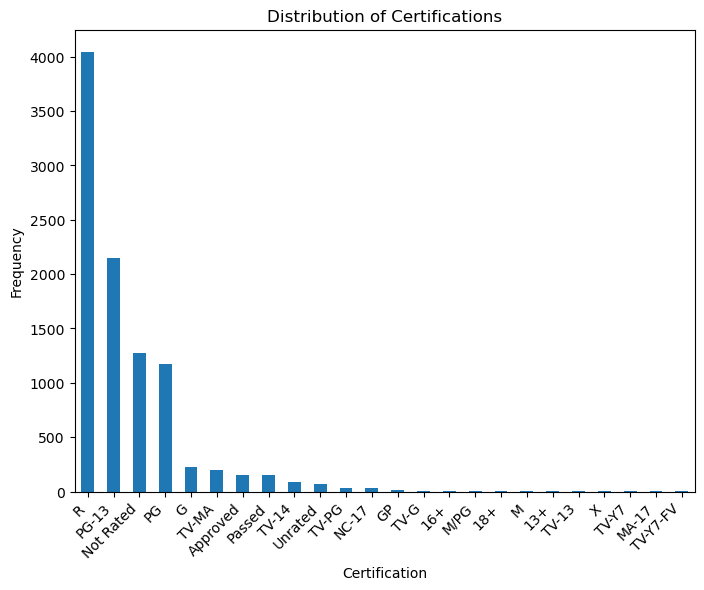

In [26]:
# Certificati distribution
certificati_counts = df['Certification'].value_counts()
plt.figure(figsize=(8, 6))
certificati_counts.plot(kind='bar')
plt.title('Distribution of Certifications')
plt.xlabel('Certification')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [27]:
def categorize_metascore(score):
    if score > 70:
        return 'Good'
    elif 50 <= score <= 70:
        return 'Okay'
    else:
        return 'Bad'

df['MetaScore_Category'] = df['MetaScore'].apply(categorize_metascore)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Encode the categorical target variable
label_encoder = LabelEncoder()
df['MetaScore_Category_Encoded'] = label_encoder.fit_transform(df['MetaScore_Category'])


X = df[['Year of Release', 'Run Time in minutes', 'Movie Rating', 'Votes', 'Gross']]  # Features
y = df['MetaScore_Category_Encoded']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5455
